# Neural Network to Identify Images of Numbers

- Using the TensorFlow Keras MNIST Dataset

In [61]:
import tensorflow as tf
import keras
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import AveragePooling2D
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import confusion_matrix

## Loading the data and formatting the shape

In [33]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
assert X_train.shape == (60000, 28, 28)
assert X_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

In [34]:
# Print the first image's pixel values (as a 2D array)
# print(X_train[0])

# Print the label of the first image
# print("Label:", y_train[0])

## Adjusing the value of each of the pixel values to be a value between 0 - 1

In [35]:
X_train = X_train/255
X_test = X_test/255

In [36]:
# Print the first image's pixel values (as a 2D array)
# print(X_train[0])

# Print the label of the first image
# print("Label:", y_train[0])

## First Model

Making a neural network from Keras' `Sequential` model. This first model uses Average Pooling and two layers.

The `Conv2D` creates 32 features in the first layer and 64 in the next layer. The `Dense` layer is the fully connected layer which learns the complex combination of features. The output layer has 10 outputs for the probability that it is guessing a particular number. 

### Notes

**What the `Conv2D` function means:**
- "I want 32 feature detectors looking at 3x3 patches of the image and passing them through the ReLU activation function (Rectified Linear Unit)."

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.AveragePooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.AveragePooling2D(pool_size=(2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [38]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_avg = model.fit(X_train, y_train, epochs=3, validation_split=0.1)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.8717 - loss: 0.4277 - val_accuracy: 0.9783 - val_loss: 0.0731
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.9771 - loss: 0.0752 - val_accuracy: 0.9838 - val_loss: 0.0514
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 40s 23ms/step - accuracy: 0.9859 - loss: 0.0463 - val_accuracy: 0.9868 - val_loss: 0.0442


In [39]:
model.evaluate(X_test, y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9865 - loss: 0.0431


[0.03606999292969704, 0.9886000156402588]

In [40]:
y_predicted_probs = model.predict(X_test)
predicted_num = np.argmax(y_predicted_probs, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step


In [41]:
print(predicted_num)

[7 2 1 ... 4 5 6]


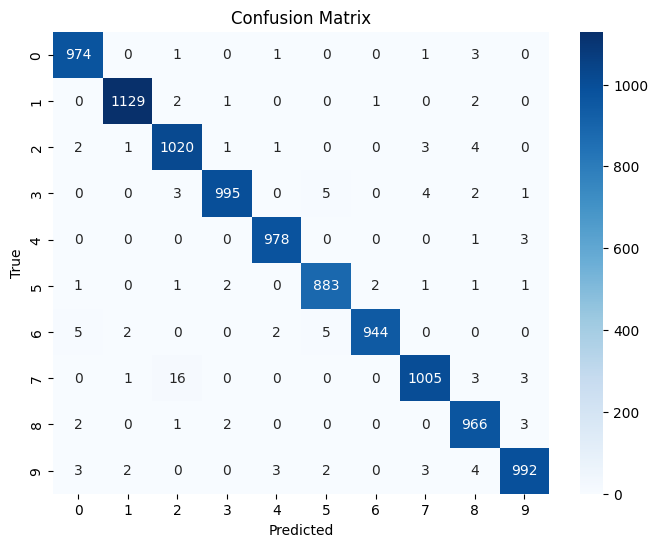

In [42]:
cm = confusion_matrix(y_test, predicted_num)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Next Model

Keeping `AveragePooling` and adding `Dropout`.

`Dropout` is a regularization technique to prevent overfitting — large discrepancy between the training and validation data. 

> Note: There isn’t necessarily a direct relationship between applying dropout and improved validation performance.

In [43]:
model2 = models.Sequential()

model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model2.add(layers.AveragePooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Conv2D(64, (3,3), activation='relu'))
model2.add(layers.AveragePooling2D(pool_size=(2, 2)))
model2.add(layers.Dropout(0.25))

model2.add(layers.Flatten())
model2.add(layers.Dense(64, activation='relu'))
model2.add(layers.Dropout(0.5))

model2.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [44]:
model2.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_avg_dropout = model2.fit(X_train, y_train, epochs=3, validation_split=0.1)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.7717 - loss: 0.7059 - val_accuracy: 0.9755 - val_loss: 0.0763
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 27ms/step - accuracy: 0.9455 - loss: 0.1901 - val_accuracy: 0.9845 - val_loss: 0.0526
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 45s 27ms/step - accuracy: 0.9608 - loss: 0.1399 - val_accuracy: 0.9863 - val_loss: 0.0500


## Trying MaxPooling and Adding Dropout

Switching from `AveragePooling` to `MaxPooling` and keeping `Dropout`.

In [45]:
model3 = models.Sequential()

model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.25))

model3.add(layers.Conv2D(64, (3,3), activation='relu'))
model3.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3.add(layers.Dropout(0.25))

model3.add(layers.Flatten())
model3.add(layers.Dense(64, activation='relu'))
model3.add(layers.Dropout(0.5))

model3.add(layers.Dense(10, activation='softmax'))

In [46]:
model3.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history_max_dropout = model3.fit(X_train, y_train, epochs=3, validation_split=0.1)

Epoch 1/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 32ms/step - accuracy: 0.7753 - loss: 0.6704 - val_accuracy: 0.9820 - val_loss: 0.0589
Epoch 2/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 31ms/step - accuracy: 0.9521 - loss: 0.1623 - val_accuracy: 0.9872 - val_loss: 0.0448
Epoch 3/3
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 31ms/step - accuracy: 0.9620 - loss: 0.1255 - val_accuracy: 0.9897 - val_loss: 0.0379


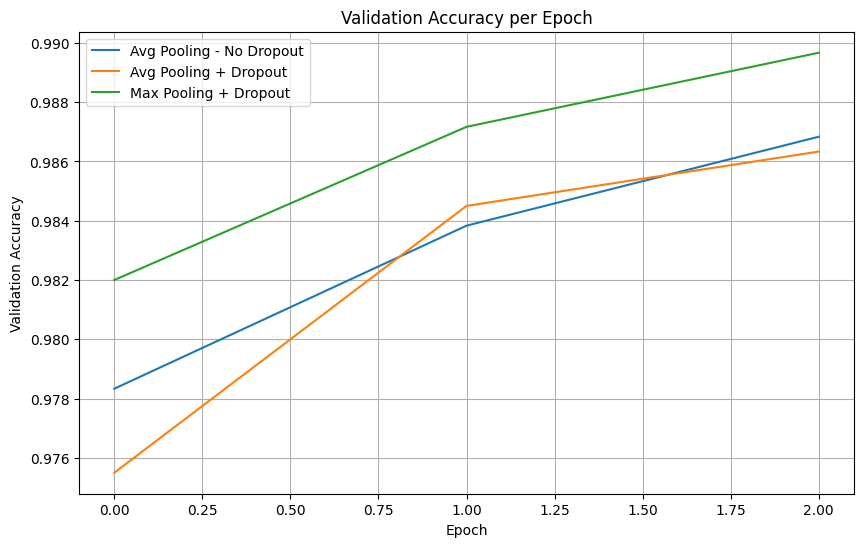

In [49]:
plt.figure(figsize=(10, 6))

plt.plot(history_avg.history['val_accuracy'], label='Avg Pooling - No Dropout')
plt.plot(history_avg_dropout.history['val_accuracy'], label='Avg Pooling + Dropout')
plt.plot(history_max_dropout.history['val_accuracy'], label='Max Pooling + Dropout')

plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


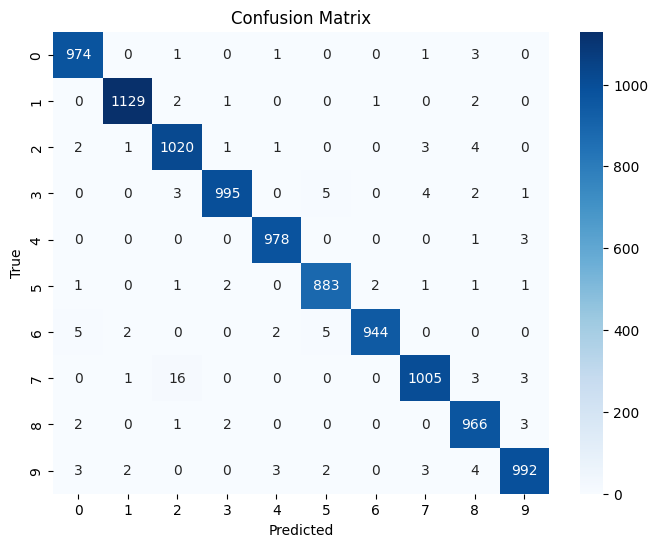

In [50]:
y_predicted_probs = model3.predict(X_test)
predicted_num = np.argmax(y_predicted_probs, axis=1)

cm_max_dropout = confusion_matrix(y_test, predicted_num)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Learned

Determined that `MaxPooling` performs best, and now the goal is to improve the model further.

## Improvements

- **Early Stopping**: Allows the model to run for more epochs, but stops training if there is no improvement in validation loss for 3 consecutive epochs.

- **Batch Normalization**: Normalizes the output from the previous layer:
  - First, it computes the **mean** of the batch.
  - Then, it calculates the **variance**:  
    $$ \text{Variance} = \frac{1}{N} \sum_{i=1}^{N} (x_i - \mu)^2 $$
  - Finally, it computes the **normalized** value for each input.

This results in inputs with a **mean of 0** and **standard deviation close to 1**, helping stabilize and speed up training.

In [53]:
model3_improved = models.Sequential()
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

model3_improved.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
model3_improved.add(layers.BatchNormalization())
model3_improved.add(layers.Activation('relu'))
model3_improved.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3_improved.add(layers.Dropout(0.25))

model3_improved.add(layers.Conv2D(64, (3,3)))
model3_improved.add(layers.BatchNormalization())
model3_improved.add(layers.Activation('relu'))
model3_improved.add(layers.MaxPooling2D(pool_size=(2, 2)))
model3_improved.add(layers.Dropout(0.25))

model3_improved.add(layers.Flatten())
model3_improved.add(layers.Dense(64))
model3_improved.add(layers.BatchNormalization())
model3_improved.add(layers.Activation('relu'))
model3_improved.add(layers.Dropout(0.5))

model3_improved.add(layers.Dense(10, activation='softmax'))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [57]:
early_stop = EarlyStopping(patience=3, restore_best_weights=True)

history_max_dropout_improved = model3.fit(X_train, y_train, epochs=30, validation_split=0.1, callbacks=[early_stop])

Epoch 1/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 56s 33ms/step - accuracy: 0.9782 - loss: 0.0743 - val_accuracy: 0.9912 - val_loss: 0.0328
Epoch 2/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9795 - loss: 0.0668 - val_accuracy: 0.9923 - val_loss: 0.0281
Epoch 3/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9813 - loss: 0.0584 - val_accuracy: 0.9928 - val_loss: 0.0261
Epoch 4/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 33ms/step - accuracy: 0.9817 - loss: 0.0618 - val_accuracy: 0.9930 - val_loss: 0.0256
Epoch 5/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 81s 32ms/step - accuracy: 0.9822 - loss: 0.0573 - val_accuracy: 0.9927 - val_loss: 0.0297
Epoch 6/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 33ms/step - accuracy: 0.9827 - loss: 0.0543 - val_accuracy: 0.9933 - val_loss: 0.0268
Epoch 7/30
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 33ms/step - accuracy: 0.9846 - loss: 0.0534 - val_accuracy: 0.9920 - val_loss: 0.0322


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step


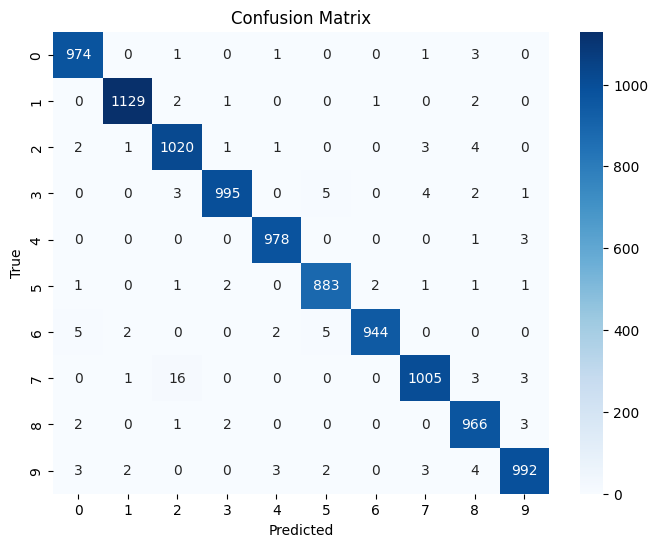

In [58]:
y_predicted_probs = model3_improved.predict(X_test)
predicted_num = np.argmax(y_predicted_probs, axis=1)

cm_max_dropout = confusion_matrix(y_test, predicted_num)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

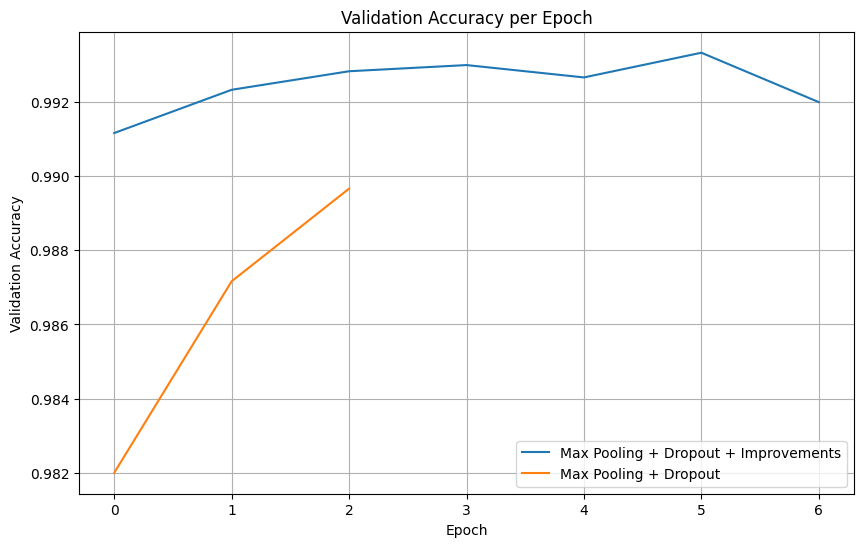

In [59]:
plt.figure(figsize=(10, 6))

plt.plot(history_max_dropout_improved .history['val_accuracy'], label='Max Pooling + Dropout + Improvements')
plt.plot(history_max_dropout.history['val_accuracy'], label='Max Pooling + Dropout')

plt.title('Validation Accuracy per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Validation Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [62]:
keras.saving.save_model(model3_improved, "mnist_model.keras")